In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

workspace = os.path.join('..', 'data', 'mfgrd_test')

### Single layer structured model

In [2]:
fn = os.path.join(workspace, 'nwtp3.dis.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
sr = grd.get_spatialreference()
extents = sr.get_extent()
vertc = grd.get_centroids()
print(vertc[0, :])

read 12 records from ../data/mfgrd_test/nwtp3.dis.grb
[ 50. -50.]


In [3]:
print(len(iverts))
print(iverts[0])
print(verts.shape)
print(verts[0:5,:])
print(sr.get_extent())

6400
[0, 1, 2, 3, 4]
(32000, 2)
[[   0.    0.]
 [   0. -100.]
 [ 100. -100.]
 [ 100.    0.]
 [   0.    0.]]
(0.0, 8000.0, -8000.0, 0.0)


In [4]:
fn = os.path.join(workspace, 'nwtp3.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(80*80)
print(h.shape)

[365.0]
(6400,)


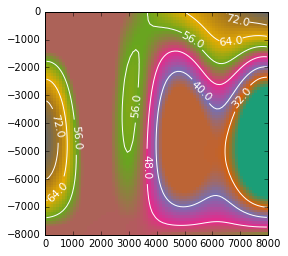

In [5]:
mm = flopy.plot.ModelMap(sr=sr, layer=0)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
mm.plot_cvfd(verts, iverts, a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11);

### Multi-layer structured model

In [6]:
fn = os.path.join(workspace, 'uzfp3_lakmvr_v2.dis.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
sr = grd.get_spatialreference()
extents = sr.get_extent()
vertc = grd.get_centroids()

read 12 records from ../data/mfgrd_test/uzfp3_lakmvr_v2.dis.grb


In [7]:
fn = os.path.join(workspace, 'uzfp3_lakmvr.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(2*15*10)
print(h.shape)
print(vertc.shape)

[2628000.0, 5256000.0, 7884000.0, 10512000.0, 13140000.0, 15768000.0, 18396000.0, 21024000.0, 23652000.0, 26280000.0, 28908000.0, 31536000.0, 34164000.0, 36792000.0, 39420000.0, 42048000.0, 44676000.0, 47304000.0, 49932000.0, 52560000.0, 55188000.0, 57816000.0, 60444000.0, 63072000.0]
(300,)
(300, 2)


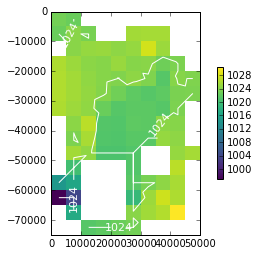

In [8]:
mm = flopy.plot.ModelMap(sr=sr, layer=0)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
v = mm.plot_cvfd(verts, iverts, a=h, ncpl=150, masked_values=[6999.], cmap='viridis')
cs = mm.contour_array_cvfd(vertc, h, ncpl=150, masked_values=[6999.], 
                           levels=[1024], colors='white')
plt.clabel(cs, fmt='%.0f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

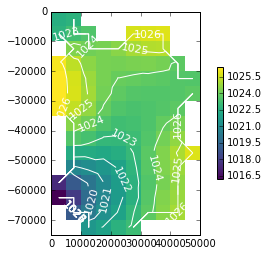

In [9]:
vertc = grd.get_centroids()
mm = flopy.plot.ModelMap(sr=sr, layer=1)
ax = plt.gca()
ax.set_xlim(extents[:2])
ax.set_ylim(extents[2:])
v = mm.plot_cvfd(verts, iverts, a=h, ncpl=150, masked_values=[6999.], cmap='viridis')
cs = mm.contour_array_cvfd(vertc, h, ncpl=150, masked_values=[6999.], 
                           levels=[1020, 1021, 1022, 1023, 1024, 1025, 1026], colors='white')
plt.clabel(cs, fmt='%.0f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer unstructured model

In [10]:
fn = os.path.join(workspace, 'flow.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
#print(vertc)

read 13 records from ../data/mfgrd_test/flow.disv.grb
returning vertices for ../data/mfgrd_test/flow.disv.grb


In [11]:
fn = os.path.join(workspace, 'flow.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


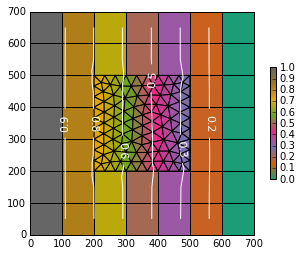

In [12]:
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer unstructured model with xt3d

In [13]:
fn = os.path.join(workspace, 'flowxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()

read 13 records from ../data/mfgrd_test/flowxt3d.disv.grb
returning vertices for ../data/mfgrd_test/flowxt3d.disv.grb


In [14]:
fn = os.path.join(workspace, 'flowxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


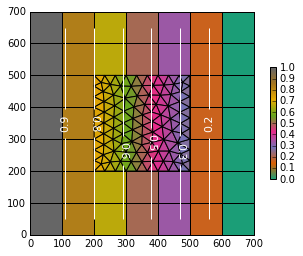

In [15]:
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer unstructured model with a well

In [16]:
fn = os.path.join(workspace, 'flowwel.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()

read 13 records from ../data/mfgrd_test/flowwel.disv.grb
returning vertices for ../data/mfgrd_test/flowwel.disv.grb


In [17]:
fn = os.path.join(workspace, 'flowwel.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).reshape(218)
print(h.shape)

[1.0]
(218,)


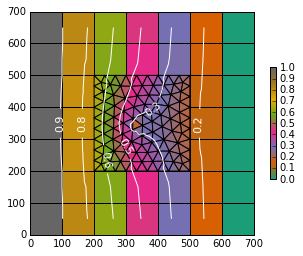

In [18]:
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer unstructured model with a well and xt3d

In [19]:
fn = os.path.join(workspace, 'flowwelxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()

read 13 records from ../data/mfgrd_test/flowwelxt3d.disv.grb
returning vertices for ../data/mfgrd_test/flowwelxt3d.disv.grb


In [20]:
fn = os.path.join(workspace, 'flowwelxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h2 = ho.get_data(totim=times[-1]).reshape(218)
print(h2.shape)

[1.0]
(218,)


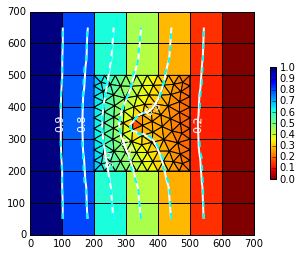

In [21]:
#f = plt.gcf()
#f.set_size_inches(15, 15)
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h2, cmap='jet_r')
cs = mm.contour_array_cvfd(vertc, h2, colors='white', linewidths=2)
cs = mm.contour_array_cvfd(vertc, h, linestyles='dashed', colors='cyan', linewidths=2)
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

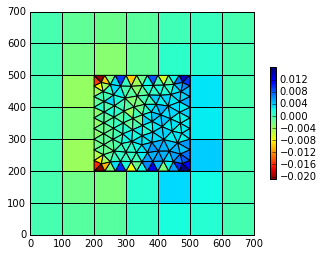

In [22]:
d = h - h2
#f = plt.gcf()
#f.set_size_inches(15, 15)
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=d, cmap='jet_r')
#cs = mm.contour_array_cvfd(vertc, d, colors='white')
#plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer nested model with a well

In [23]:
fn = os.path.join(workspace, 'flowquadwel.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()

read 13 records from ../data/mfgrd_test/flowquadwel.disv.grb
returning vertices for ../data/mfgrd_test/flowquadwel.disv.grb


In [24]:
fn = os.path.join(workspace, 'flowquadwel.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h = ho.get_data(totim=times[-1]).flatten()
print(h.shape)

[1.0]
(121,)


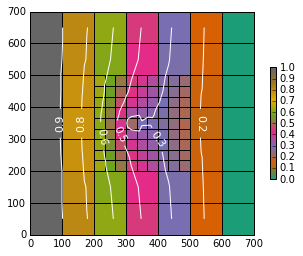

In [25]:
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h)
cs = mm.contour_array_cvfd(vertc, h, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)

### Single-layer nested model with a well and xt3d

In [26]:
fn = os.path.join(workspace, 'flowquadwelxt3d.disv.grb')
grd = flopy.utils.MfGrdFile(fn, verbose=True)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()

read 13 records from ../data/mfgrd_test/flowquadwelxt3d.disv.grb
returning vertices for ../data/mfgrd_test/flowquadwelxt3d.disv.grb


In [27]:
fn = os.path.join(workspace, 'flowquadwelxt3d.hds.cmp')
ho = flopy.utils.HeadFile(fn, precision='double')
times = ho.get_times()
print(times)
h2 = ho.get_data(totim=times[-1]).flatten()
print(h2.shape)

[1.0]
(121,)


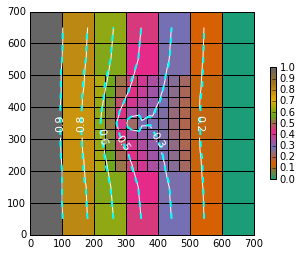

In [28]:
#f = plt.gcf()
#f.set_size_inches(10,10)
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=h2)
cs = mm.contour_array_cvfd(vertc, h2, colors='white')
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
cs = mm.contour_array_cvfd(vertc, h, linestyles='dashed', colors='cyan', linewidths=2)
plt.colorbar(v, shrink=0.5)

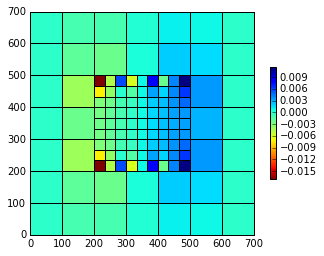

In [29]:
d = h - h2
#f = plt.gcf()
#f.set_size_inches(15, 15)
mm = flopy.plot.ModelMap()
ax = plt.gca()
ax.set_xlim(0,700)
ax.set_ylim(0,700)
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=d, cmap='jet_r')
#cs = mm.contour_array_cvfd(vertc, d, colors='white')
#plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
plt.colorbar(v, shrink=0.5)